## Dependencies

In [1]:
# !pip install fbprophet
# !pip install holidays
# !pip install pmdarima
# !pip install git+https://github.com/ourownstory/neural_prophet.git

## Imports

In [1]:
# Modular Imports
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from userInputs import importFile,getInfo
from engineerings import getDateColumns,time_engineering,train_test_split,interpolateTarget
from plots import basicPlot,decompositionPlot,fbprophet_plots,neural_prophet_plots
from init import INIT
import joblib
from pmdarima import auto_arima
from pmdarima.metrics import smape
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import VotingRegressor,StackingRegressor
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation as fcv
from fbprophet.diagnostics import performance_metrics
from neuralprophet import NeuralProphet
import holidays
import itertools
import pdb
from arch import arch_model

## Main Function

This is Time Series Folder and All functions and files will be contained here
#### For now use only CSV files ####
Enter filename for TimeSeries : inf.csv
#### RUNNING WAIT ####
extension is csv
We have a csv file
This file has 15 columns and 100 rows
The columns found are :
Index(['Date', 'Symbol', 'Series', 'Prev_Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable_Volume',
       '%Deliverble'],
      dtype='object')
Enter the target column : Turnover

The date columns found are :
['Date']
Enter the primary date column : Date
Select a forecast period: 
1. Daily
2. Weekly
3. Monthly
4. Quarterly
5. Semi-Annual
6. Annual
Enter the number: 6
Enter the number of periods of forecast: 1
INFO COLLECTED! FORECAST PERIOD NOT APPLIED IN THE CODE!
INFO SAVED!

INIT STARTED!
IMPORTING NECESSARY FILES
#### RUNNING WAIT ####
extension is csv
We have a csv file
This file has 15 columns and 248 rows
(248, 15)

#### Preparing Data For Univariate

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

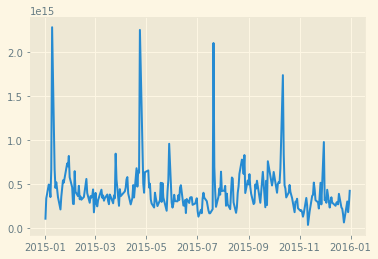

In [64]:
# def main(test=False,props=None):
#     print('This is Time Series Folder and All functions and files will be contained here')
#     print('#### For now use only CSV files ####')
#     ## Importing File ## We need to store CSV files in test folder in TimeSeries ##
#     if not test:
#         # For single file manual testing
#         path = input('Enter filename for TimeSeries : ').strip()
#         if path == '':
#             print('\nNo File Selected, QUITTING!')
#             return 1,0
#         df,_ = importFile(path,nrows=100)
#     else:
#         # For Automated Testing
#         df,_ = importFile(props[path],nrows=100)
#     # Stripping trailing and leading spaces and replacing spaces in between with _
#     df.columns = [x.strip().replace(' ','_') for x in df.columns]
#     datecols,_ = getDateColumns(df.select_dtypes('object'))
#     if len(datecols) == 0:
#         print('No datecolumns found, QUITTING!')
#         return None,None

#     info = getInfo(df.columns,datecols) # Get Target and Primary Date Column
    
#     print('INFO COLLECTED! FORECAST PERIOD NOT APPLIED IN THE CODE!')

#     if not info:
#         print('QUITTING!')
#         return None,None

#     info['DateColumns'] = datecols
#     joblib.dump(info,'info');print('INFO SAVED!')

#     # Reimporting complete data, slicing date and target columns,
#     props = INIT(path,info)
#     frontEndProgressBar = 0.05
#     print('\n{}% done on frontEndProgessBar\n'.format(frontEndProgressBar*100))

#     props = time_engineering(props)
#     if props == dict():
#         print('QUITTING!');return None,None
#     frontEndProgressBar = 0.10
#     print('\n{}% done on frontEndProgessBar'.format(frontEndProgressBar*100))

#     basicPlot(props)
#     frontEndProgressBar = 0.20
#     print('\n{}% done on frontEndProgessBar'.format(frontEndProgressBar*100))
    
#     print('\nApplying Linear Interpolation to the Training Target Column')    
#     props = interpolateTarget(props)
#     frontEndProgressBar = 0.30
#     print('\n{}% done on frontEndProgessBar'.format(frontEndProgressBar*100))
    
#     decompositionPlot(props)
#     frontEndProgressBar = 0.40
#     print('\n{}% done on frontEndProgessBar'.format(frontEndProgressBar*100))

#     props['Margin'] = int(len(props['df'])*0.8)
#     X_train,y_train,X_test,y_test = train_test_split(props)
#     print('\nTrain_Test_Split (FIT SAMPLE / HOLD_OUT SAMPLE SPLIT DONE!)')
    
# # =============================================================================
# #     print('\nPower Transforming Exogenous Features!')
# #     PT = PowerTransformer()
# #     col_names = X_train.columns
# #     X_train = pd.DataFrame(PT.fit_transform(X_train),columns=col_names)
# #     X_test = pd.DataFrame(PT.fit_transform(X_test),columns=col_names)
# # =============================================================================
    
#     print('\nPreparing Holiday list and DataFrame with -5 and 5 window')
#     us_hols = holidays.UnitedStates(years=props['df'].index.year.to_list())
#     us_hols_df = pd.DataFrame(us_hols.items(),columns=['ds','holiday'])
#     us_hols_df['lower_window'] = -5
#     us_hols_df['upper_window'] = 5
    
#     MODEL_COMPARISON = pd.DataFrame()
#     mc_cols_index = 0
    
# # =============================================================================
# #     AUTO ARIMA
# # =============================================================================

# # =============================================================================
#     print('\n#### FITTING AUTO-ARIMA MODEL #### RUNNING WAIT ####')

#     AutoArimaModel = pm.auto_arima(train,n_fits=15,test='adf',method='bfgs',exogenous=X_train)
#     AutoArimaForecasts = pd.Series(AutoArimaModel.predict(len(X_test),exogenous=X_test),index=y_test.index)
    
# #     AutoArimaModel = auto_arima(y_train,seasonal=True,suppress_warnings=True)
# #     AutoArimaForecasts = pd.Series(AutoArimaModel.predict(len(X_test)),index=y_test.index)
    
#     print('\nThe mean absolute percentage error for Auto Arima is')
#     print(smape(y_test,AutoArimaForecasts))
#     props['AutoArima'] = AutoArimaModel
#     MODEL_COMPARISON.loc[mc_cols_index,'Model'] = AutoArimaModel
#     MODEL_COMPARISON.loc[mc_cols_index,'Model Name'] = 'Auto Regressive Integrated Moving Average'
#     MODEL_COMPARISON.loc[mc_cols_index,'Mean Absolute Percentage Error'] = smape(y_test, AutoArimaForecasts)
#     MODEL_COMPARISON.loc[mc_cols_index,'Mean Squared Error'] = mean_squared_error(y_test,AutoArimaForecasts)
#     MODEL_COMPARISON.loc[mc_cols_index,'Mean Absolute Error'] = mean_absolute_error(y_test,AutoArimaForecasts)
#     plt.plot(y_test,label='Actual Values')
#     plt.plot(AutoArimaForecasts,label='Auto Arima Prediction')
#     plt.legend(loc=2)
#     plt.show()
#     mc_cols_index += 1
# # =============================================================================
    
# # =============================================================================
# #     AUTO ARIMA
# # =============================================================================

# # # =============================================================================
# # # NEURALPROPHET
# # # =============================================================================

# # # =============================================================================
# #     print('\n#### NEURAL PROPHET MODEL #### RUNNING WAIT ####')
# #     dsy = pd.concat([X_train,y_train.rename('y')],axis=1)
# # #     dsy.drop(X_train.columns,axis=1,inplace=True)
# #     dsy['ds'] = dsy.index
# #     neuralProphetModel = NeuralProphet(learning_rate=0.01,epochs=500,n_forecasts=12,loss_func='mse')
# #     for col in X_train.columns:
# #         neuralProphetModel.add_future_regressor(col)  
# #     epoch_df_info = neuralProphetModel.fit(dsy,freq='D')
# #     future = neuralProphetModel.make_future_dataframe(dsy,periods=len(y_test),regressors_df=X_test)
# # #     future = neuralProphetModel.make_future_dataframe(dsy,periods=len(y_test))
# #     future.index = X_test.index
# #     neuralProphetForecasts = neuralProphetModel.predict(future)
# #     neuralProphetForecasts.index = y_test.index
# #     print('\nThe mean squared error for Neural Prophet is') 
# #     print(mean_squared_error(y_test,neuralProphetForecasts['yhat1']))
# #     props['NeuralProphet'] = neuralProphetModel
# #     MODEL_COMPARISON.loc[mc_cols_index,'Model'] = neuralProphetModel
# #     MODEL_COMPARISON.loc[mc_cols_index,'Model Name'] = 'Neural Prophet'
# #     MODEL_COMPARISON.loc[mc_cols_index,'Mean Absolute Percentage Error'] = smape(y_test, neuralProphetForecasts['yhat1'])
# #     MODEL_COMPARISON.loc[mc_cols_index,'Mean Squared Error'] = mean_squared_error(y_test,neuralProphetForecasts['yhat1'])
# #     MODEL_COMPARISON.loc[mc_cols_index,'Mean Absolute Error'] = mean_absolute_error(y_test,neuralProphetForecasts['yhat1'])
# #     plt.plot(y_test,label='Actual Values')
# #     plt.plot(neuralProphetForecasts['yhat1'],label='Neural Prophet Prediction')
# #     plt.legend(loc=2)
# #     plt.show()
# #     neural_prophet_plots(neuralProphetModel,neuralProphetForecasts)
# #     mc_cols_index += 1
# # # =============================================================================

# # # =============================================================================
# # # NEURALPROPHET
# # # =============================================================================

# # # =============================================================================
# # # FBPROPHET
# # # =============================================================================
# #     print('\n#### FBPROPHET MODEL #### RUNNING WAIT ####')
# # #     fbspace = {  
# # #     'changepoint_prior_scale': [0.01, 0.1],
# # #     'seasonality_prior_scale': [1.0, 10.0],
# # #     'seasonality_mode':['additive','multiplicative']
# # # }
    
# # #     all_params = [dict(zip(fbspace.keys(), v)) for v in itertools.product(*fbspace.values())]
# # #     rmses = []  # Store the RMSEs for each params here
    
# # #     # Use cross validation to evaluate all parameters
# # #     for params in all_params:
# # #         m = Prophet(**params)  # Fit model with given params
# # #         for col in X_train.columns:
# # #             m.add_regressor(col) 
# # #         m = m.fit(dsy)
# # #         df_cv = fcv(m, horizon='30 days')
# # #         df_p = performance_metrics(df_cv, rolling_window=1)
# # #         rmses.append(df_p['rmse'].values[0])
    
# # #     # Find the best parameters
# # # #     print('\nPrinting Tuning Results!')
# # # #     tuning_results = pd.DataFrame(all_params)
# # # #     tuning_results['rmse'] = rmses
# # # #     print(tuning_results)
    
# # #     best_params = all_params[np.argmin(rmses)]
# # #     print('\nFitting FBProphet with best params!')
    
# # #     fbprophetModel = Prophet(**best_params)
# #     fbprophetModel = Prophet()
# #     for col in X_train.columns:
# #         fbprophetModel.add_regressor(col)
# #     fbProphetForecasts = fbprophetModel.fit(dsy).predict(future)
# #     fbProphetForecasts.index = y_test.index
# #     print('\nThe mean squared error for FBProphet is') 
# #     print(mean_squared_error(y_test,fbProphetForecasts['yhat']))
# #     props['FBProphet'] = fbprophetModel
# #     MODEL_COMPARISON.loc[mc_cols_index,'Model'] = fbprophetModel
# #     MODEL_COMPARISON.loc[mc_cols_index,'Model Name'] = 'Facebook Prophet'
# #     MODEL_COMPARISON.loc[mc_cols_index,'Mean Absolute Percentage Error'] = smape(y_test, fbProphetForecasts['yhat'])
# #     MODEL_COMPARISON.loc[mc_cols_index,'Mean Squared Error'] = mean_squared_error(y_test,fbProphetForecasts['yhat'])
# #     MODEL_COMPARISON.loc[mc_cols_index,'Mean Absolute Error'] = mean_absolute_error(y_test,fbProphetForecasts['yhat'])
# #     plt.plot(y_test,label='Actual Values')
# #     plt.plot(fbProphetForecasts['yhat'],label='FBProphet Prediction')
# #     plt.legend(loc=2)
# #     plt.show()
# #     fbprophet_plots(fbprophetModel,fbProphetForecasts)
# #     mc_cols_index += 1
# # # =============================================================================

# # # =============================================================================
# # # FBPROPHET
# # # =============================================================================

#     MODEL_COMPARISON.drop(['Model'],axis=1).to_csv('MC.csv')

#     return 1,props['exceptionsHandled']

# if __name__ == '__main__':
#     returnValue,numberOfErrors = main()
#     print('\n#### Code run successfully ####\n')

## Model Comparison

In [4]:
print('Lower the Mean Absolute Percent Error, better the model!')
print('#### WHILE SAVING CSV INDEX WILL START FROM 1')
pd.read_csv('MC.csv').drop('Unnamed: 0',axis=1).sort_values('Mean Absolute Percentage Error').reset_index(drop=True)

Lower the Mean Absolute Percent Error, better the model!
#### WHILE SAVING CSV INDEX WILL START FROM 1


,Model Name,Mean Absolute Percentage Error,Mean Squared Error,Mean Absolute Error
0,Auto Regressive Integrated Moving Average,50.667285,4.411967e+28,1.695628e+14


In [192]:
import pmdarima as pm
from pmdarima import model_selection
from sklearn.preprocessing import PowerTransformer,MinMaxScaler
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import inspect

df,_ = importFile('inf.csv')
df = df[['Turnover','Date']]
df.index = df['Date']
df.drop(['Date'],axis=1,inplace=True)
margin = int(len(df)*0.8)
train = df[:margin]
test = df[margin:]
print(len(train),len(test))

#### RUNNING WAIT ####
extension is csv
We have a csv file
This file has 15 columns and 248 rows
198 50


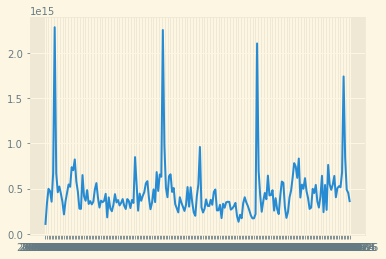

In [193]:
plt.plot(train)

In [195]:
arima = ARIMA(train,order=[20,2,40])

C:\Users\Ganesh\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Ganesh\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Ganesh\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [196]:
fitted_model = arima.fit()

C:\Users\Ganesh\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ganesh\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ganesh\anaconda3\envs\myenv\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [197]:
preds = pd.Series(fitted_model.forecast(len(test)))
preds.index = test.index

C:\Users\Ganesh\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [198]:
print(smape(preds,test))

76.08871132541752


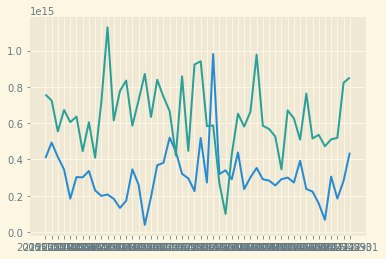

In [199]:
plt.plot(test,label='test')
plt.plot(preds,label='preds')